# Task 3-Exploratory Data Analysis - Retail

## Importing some important libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Analysis of Dataset

In [3]:
df.shape

(9994, 13)

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Drop Unwanted Features

In [8]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [9]:
#drop country as we don't need this column to analyse the dataset futher
df.drop(['Country'],inplace=True, axis=1)

## Cheking the Null values

In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [147]:
# There is no null value is present in the dataset

## Duplicate data

In [11]:
df.duplicated().sum()

17

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.shape

(9977, 12)

In [14]:
# now the duplicate record has removed from the dataset

## Correlation

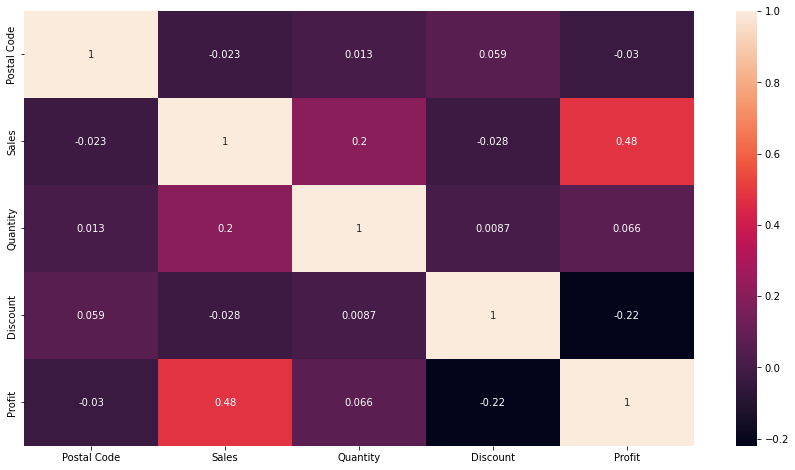

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the correlation coefficients it is evident that relation between variables is not strong enough. Discount and Profit,Discount and Sales are weak negatively Correlated. Sales and profit are weak positively correlated.


## Sales Vs Profit Vs Discount

### a) Based on Region

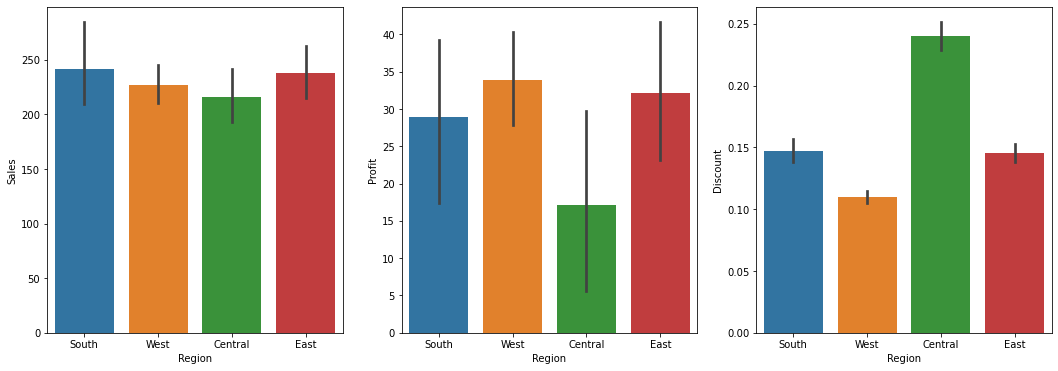

In [16]:
fig, ax =plt.subplots(1,3,figsize=(18,6))
sns.barplot(x='Region', y='Sales', data = df,ax=ax[0])
sns.barplot(x='Region', y='Profit', data = df,ax=ax[1])
sns.barplot(x='Region', y='Discount', data = df,ax=ax[2])
plt.show()

From the above graph we can conclude that south region has highest sales, central region has low profit for high discount and west region has high profit for low discount.

### b) Based on Category

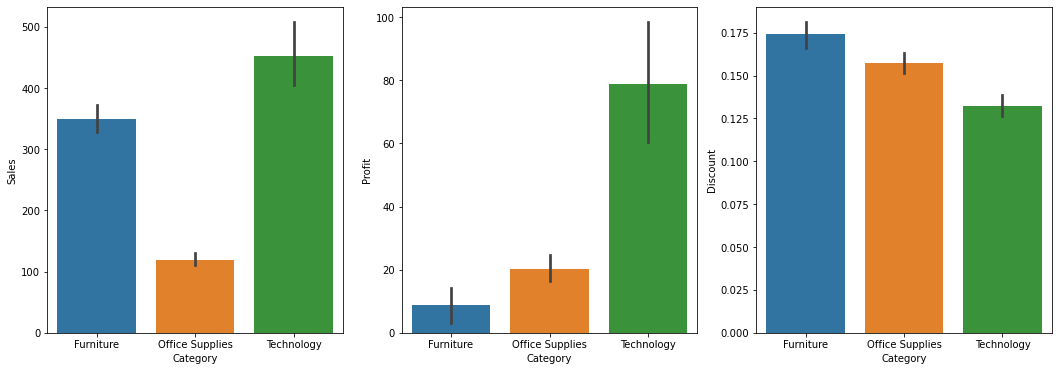

In [17]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
sns.barplot(x='Category', y='Sales', data = df,ax=ax[0])
sns.barplot(x='Category', y='Profit', data = df,ax=ax[1])
sns.barplot(x='Category', y='Discount', data = df,ax=ax[2])
plt.show()

From the above graph we can see that technology has highest sales. Discount is low and profit is high for technology.
Furniture has high sales. As discount is also high for furniture, so we can see that profit is low for furniture.

### c) Based on Segement

<AxesSubplot:xlabel='Segment', ylabel='Discount'>

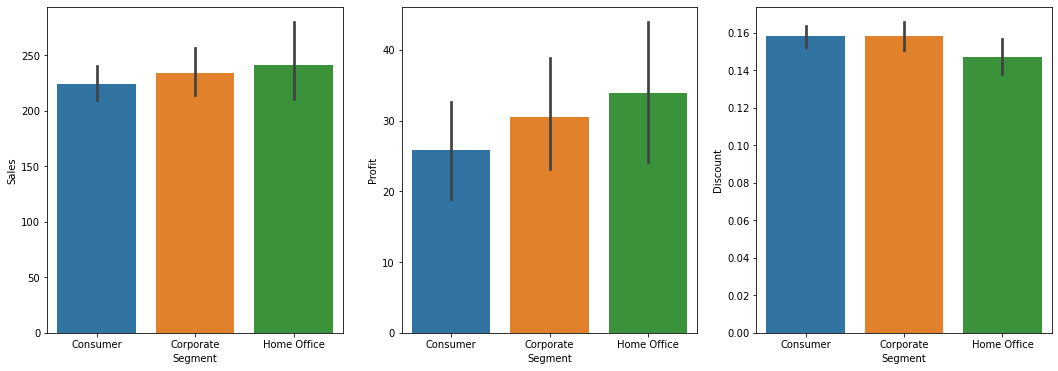

In [18]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
sns.barplot(x='Segment', y='Sales', data = df,ax=ax[0])
sns.barplot(x='Segment', y='Profit', data = df,ax=ax[1])
sns.barplot(x='Segment', y='Discount', data = df,ax=ax[2])

We can observe that both sales and profit of "Home Office" segment is highest but have less discounts.
Having high discounts in consumer segment , it has low profits.

### d) Based on Ship mode

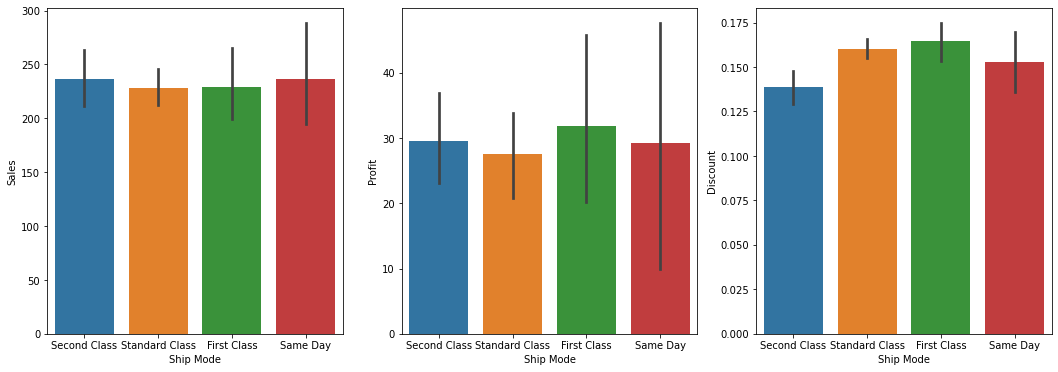

In [19]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
sns.barplot(x='Ship Mode', y='Sales', data = df,ax=ax[0])
sns.barplot(x='Ship Mode', y='Profit', data = df,ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount', data = df,ax=ax[2])
plt.show()

Most sales are in where shipping is carried on Same day.

Due to high discounts in first class, it has Maximum profits.

### e) Based on Quantity

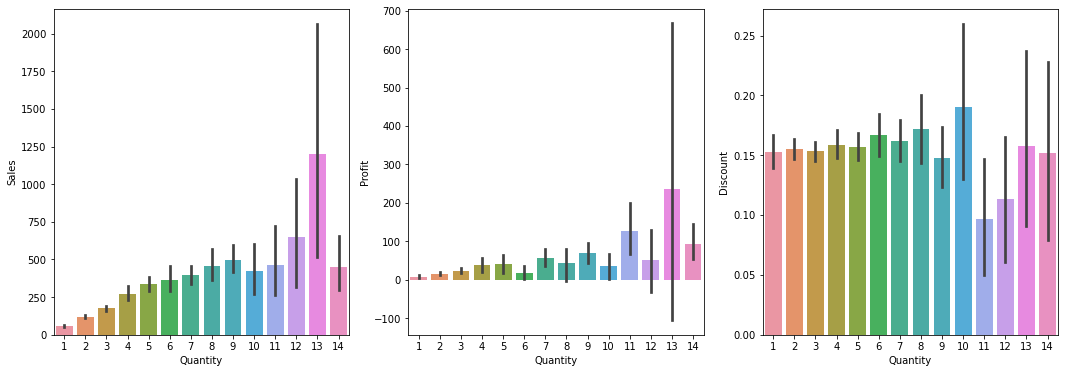

In [20]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
sns.barplot(x='Quantity', y='Sales', data = df,ax=ax[0])
sns.barplot(x='Quantity', y='Profit', data = df,ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data = df,ax=ax[2])
plt.show()

Quantity of 13 is high on sales and profit but maximum discount is given on 10.

### f) Based on Discount

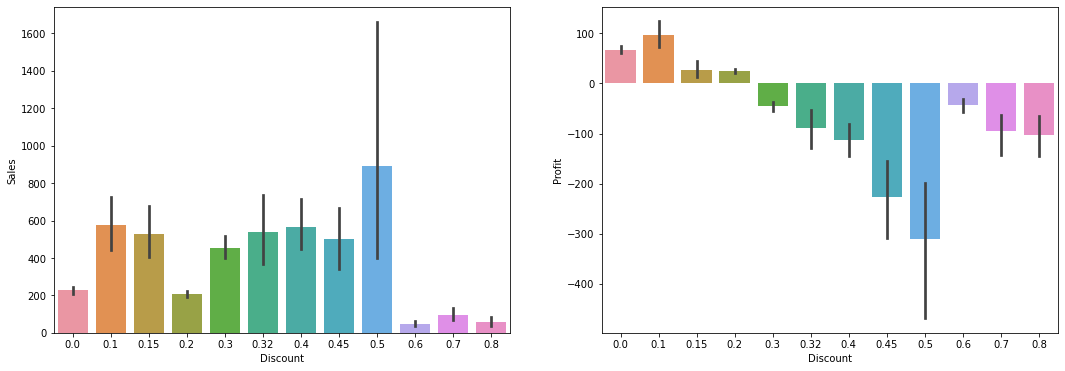

In [21]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
sns.barplot(x='Discount', y='Sales', data = df,ax=ax[0])
sns.barplot(x='Discount', y='Profit', data = df,ax=ax[1])
plt.show()

At the 50% discount sales are maximum ans as the discount is increasing profit is decreasing negatively.

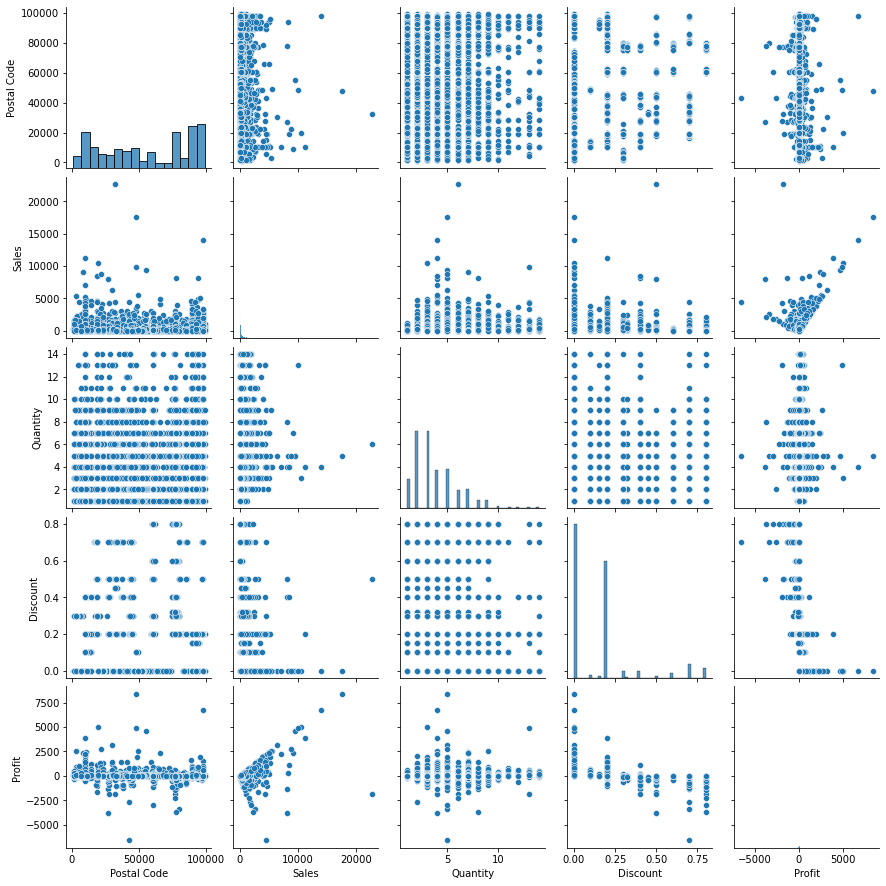

In [23]:
sns.pairplot(df)
plt.show()

## Number of quantity in each Category

In [26]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

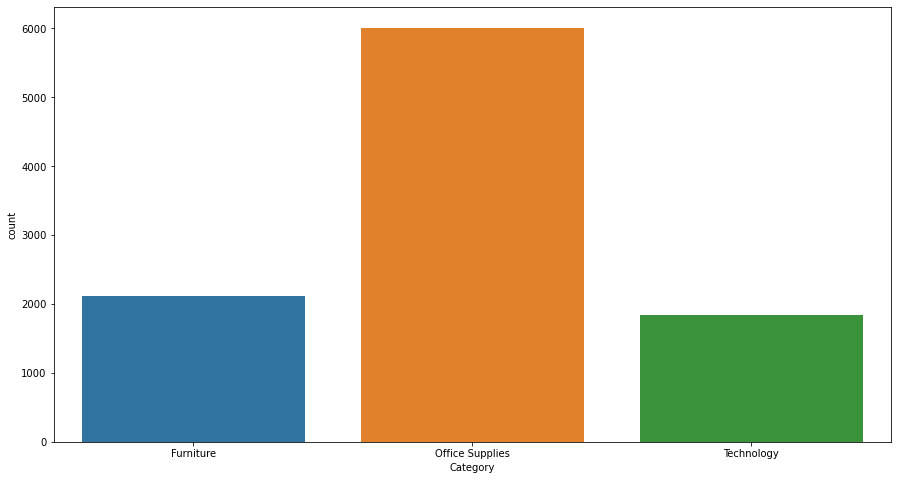

In [27]:
plt.figure(figsize=(15,8))
sns.countplot("Category", data = df)
plt.show()

The count of office supplies sold is highest when compared to remaining categories.

## Number of Quantity in each Sub-Category

In [28]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [36]:
df['Sub-Category'].value_counts().index

Index(['Binders', 'Paper', 'Furnishings', 'Phones', 'Storage', 'Art',
       'Accessories', 'Chairs', 'Appliances', 'Labels', 'Tables', 'Envelopes',
       'Bookcases', 'Fasteners', 'Supplies', 'Machines', 'Copiers'],
      dtype='object')

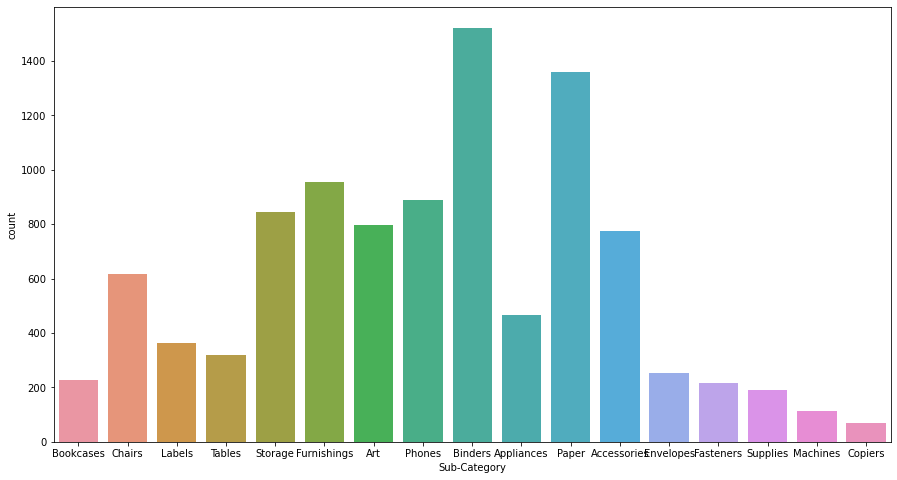

In [38]:
plt.figure(figsize=(15,8))
sns.countplot("Sub-Category", data = df)
plt.show()

The sales of Binders and papers are highest compared to all other sub-categories

## Total Sub-Categories by Percentage

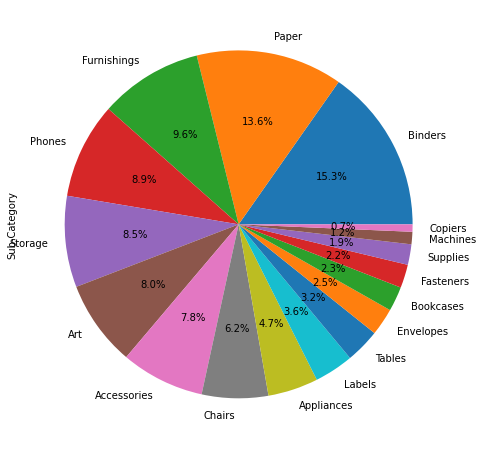

In [41]:
plt.figure(figsize=(15,8))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The store has wide variety of Office Supplies especially in Binders and Paper department.

## Category-wise Discount and Profit

In [55]:
df_Discount = df.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
df_Profit =df.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
df1= pd.merge(df_Discount,df_Profit, how='inner',on='Category')
df1.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
df1

,Category,Overall_Discount,Overall_Profit
0,Office Supplies,946.20,122364.6608
1,Furniture,368.59,18421.8137
2,Technology,244.40,145454.9481


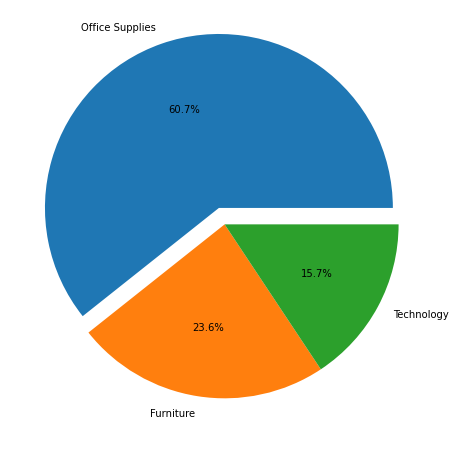

In [58]:
plt.figure(figsize=(15,8))
plt.pie(df1["Overall_Discount"], labels=Category, autopct='%1.1f%%',explode=(0.1,0,0))
plt.show()

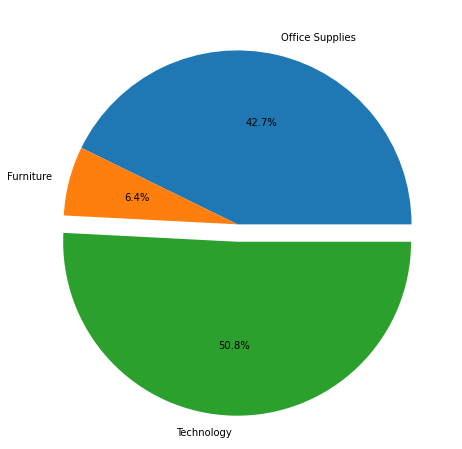

In [60]:
plt.figure(figsize=(15,8))
plt.pie(df1["Overall_Profit"],explode=(0,0,0.1), labels=Category, autopct='%1.1f%%')
plt.show()

From the above two charts we can observed profit percentage and Discount percentage for each category.Here we can visualize that "Office Supplies" has suffered the highest amount of profit and Discount as well but on the other hand "Technology" category has lowest discount among all categories but gaining good amount of profit. we are facing loss in "Furniture" category.

## COMPARING QUANTITY AND SALES DIAGRAMS ON THE BASIS OF 'CATEGORY'

In [54]:
df_Quantity = df.groupby(['Category']).Quantity.sum().sort_values(ascending = False).reset_index()
df_Sales =df.groupby(['Category']).Sales.sum().sort_values(ascending = False).reset_index()
df2= pd.merge(df_Quantity,df_Sales, how='inner',on='Category')
df2.rename(columns={'Quantity':'Total_Quantity','Sales':'Total_Sales'},inplace = True)
df2

,Category,Total_Quantity,Total_Sales
0,Office Supplies,22861,718735.2440
1,Furniture,8020,741306.3133
2,Technology,6939,836154.0330


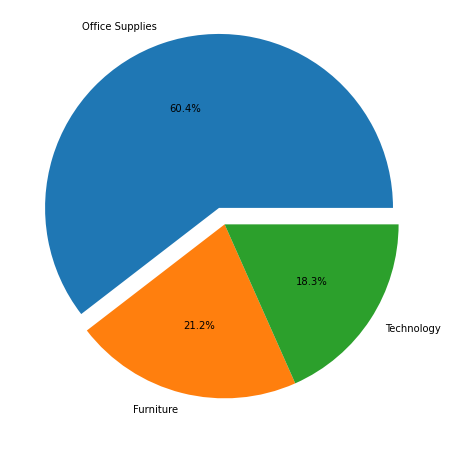

In [61]:
plt.figure(figsize=(15,8))
plt.pie(df2["Total_Quantity"],explode=(0.1,0,0), labels=Category, autopct='%1.1f%%')
plt.show()

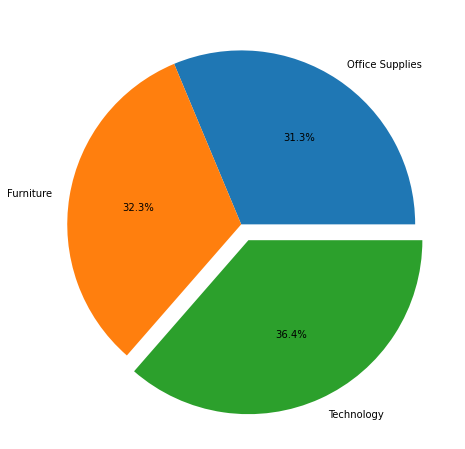

In [64]:
plt.figure(figsize=(15,8))
plt.pie(df2["Total_Sales"],explode=(0,0,0.1), labels=Category, autopct='%1.1f%%')
plt.show()

Above Charts representing "Office Supplies" has the highest amount of quantity and Sales also but on the other hand "Technology" category & "Furniture" category consist of lesser amount of total quantity but Total Sales Percentage are good enough.

CONCLUSION:

Correlation Matrix showing positive relationship between Profit & Sales, Quantity & Sales.

Company offering more Discount on Office Suppliers & furniture Category. If the company is providing less discount then profit is more on that category.

Profits and Sales are not Linear in most of the states.

Florida, Texas, Pennsylvania, Illinois, Arizona, Tennesse, Orgeon, Colorado and Ohio are the loss making states.

Central region needs to be given more attention.

Machines and supplies are having less profit and are a loss making sub-category.

Furnitures are not providing much profit margin.

TECHNOLOGY gives more profit compared to furniture category.

Profits can be maximised if the Ship mode is 'Same day'.

Western region has more profit margins, by analysing the marketing stratergies the profit of other regions and be increased.
Vermont state is having high profit margin even though the sales are not high, marketing strategies analysis needs to be performed.

Discount less than or equal to 50% is having highest sales and profit marging.

Provide optimal Discount to Technology and Furniture to attract much customers
The Top 5 Sub-Categories account to ~50% of the Sales, suggesting need for accelerated marketing Strategies or introducing additional Products in those categories.

## Thank You!